In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [57]:
c=pd.read_excel('C:/Users/hp/Downloads/Github/Repository/Concrete_Data.xlsx')
cs=pd.DataFrame(c)

In [58]:
cs.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [59]:
cs.columns=['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Agg','Fine Agg','Age','Concrete compressive stength']

In [60]:
cs.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Agg,Fine Agg,Age,Concrete compressive stength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [61]:
cs.isnull().sum()

Cement                          0
Blast Furnace Slag              0
Fly Ash                         0
Water                           0
Superplasticizer                0
Coarse Agg                      0
Fine Agg                        0
Age                             0
Concrete compressive stength    0
dtype: int64

In [62]:
cs.skew()

Cement                          0.509517
Blast Furnace Slag              0.800737
Fly Ash                         0.537445
Water                           0.074324
Superplasticizer                0.908113
Coarse Agg                     -0.040206
Fine Agg                       -0.252979
Age                             3.269177
Concrete compressive stength    0.416922
dtype: float64

In [63]:
for col in cs.columns:
    if cs.skew().loc[col]>0.55:
        cs[col]=np.log1p(cs[col])

In [64]:
cs.skew()

Cement                          0.509517
Blast Furnace Slag             -0.032692
Fly Ash                         0.537445
Water                           0.074324
Superplasticizer               -0.324634
Coarse Agg                     -0.040206
Fine Agg                       -0.252979
Age                            -0.005085
Concrete compressive stength    0.416922
dtype: float64

In [65]:
from scipy.stats import zscore
z=np.abs(zscore(cs))
cs_new=cs[(z<3).all(axis=1)]

In [66]:
cs_new.shape

(1028, 9)

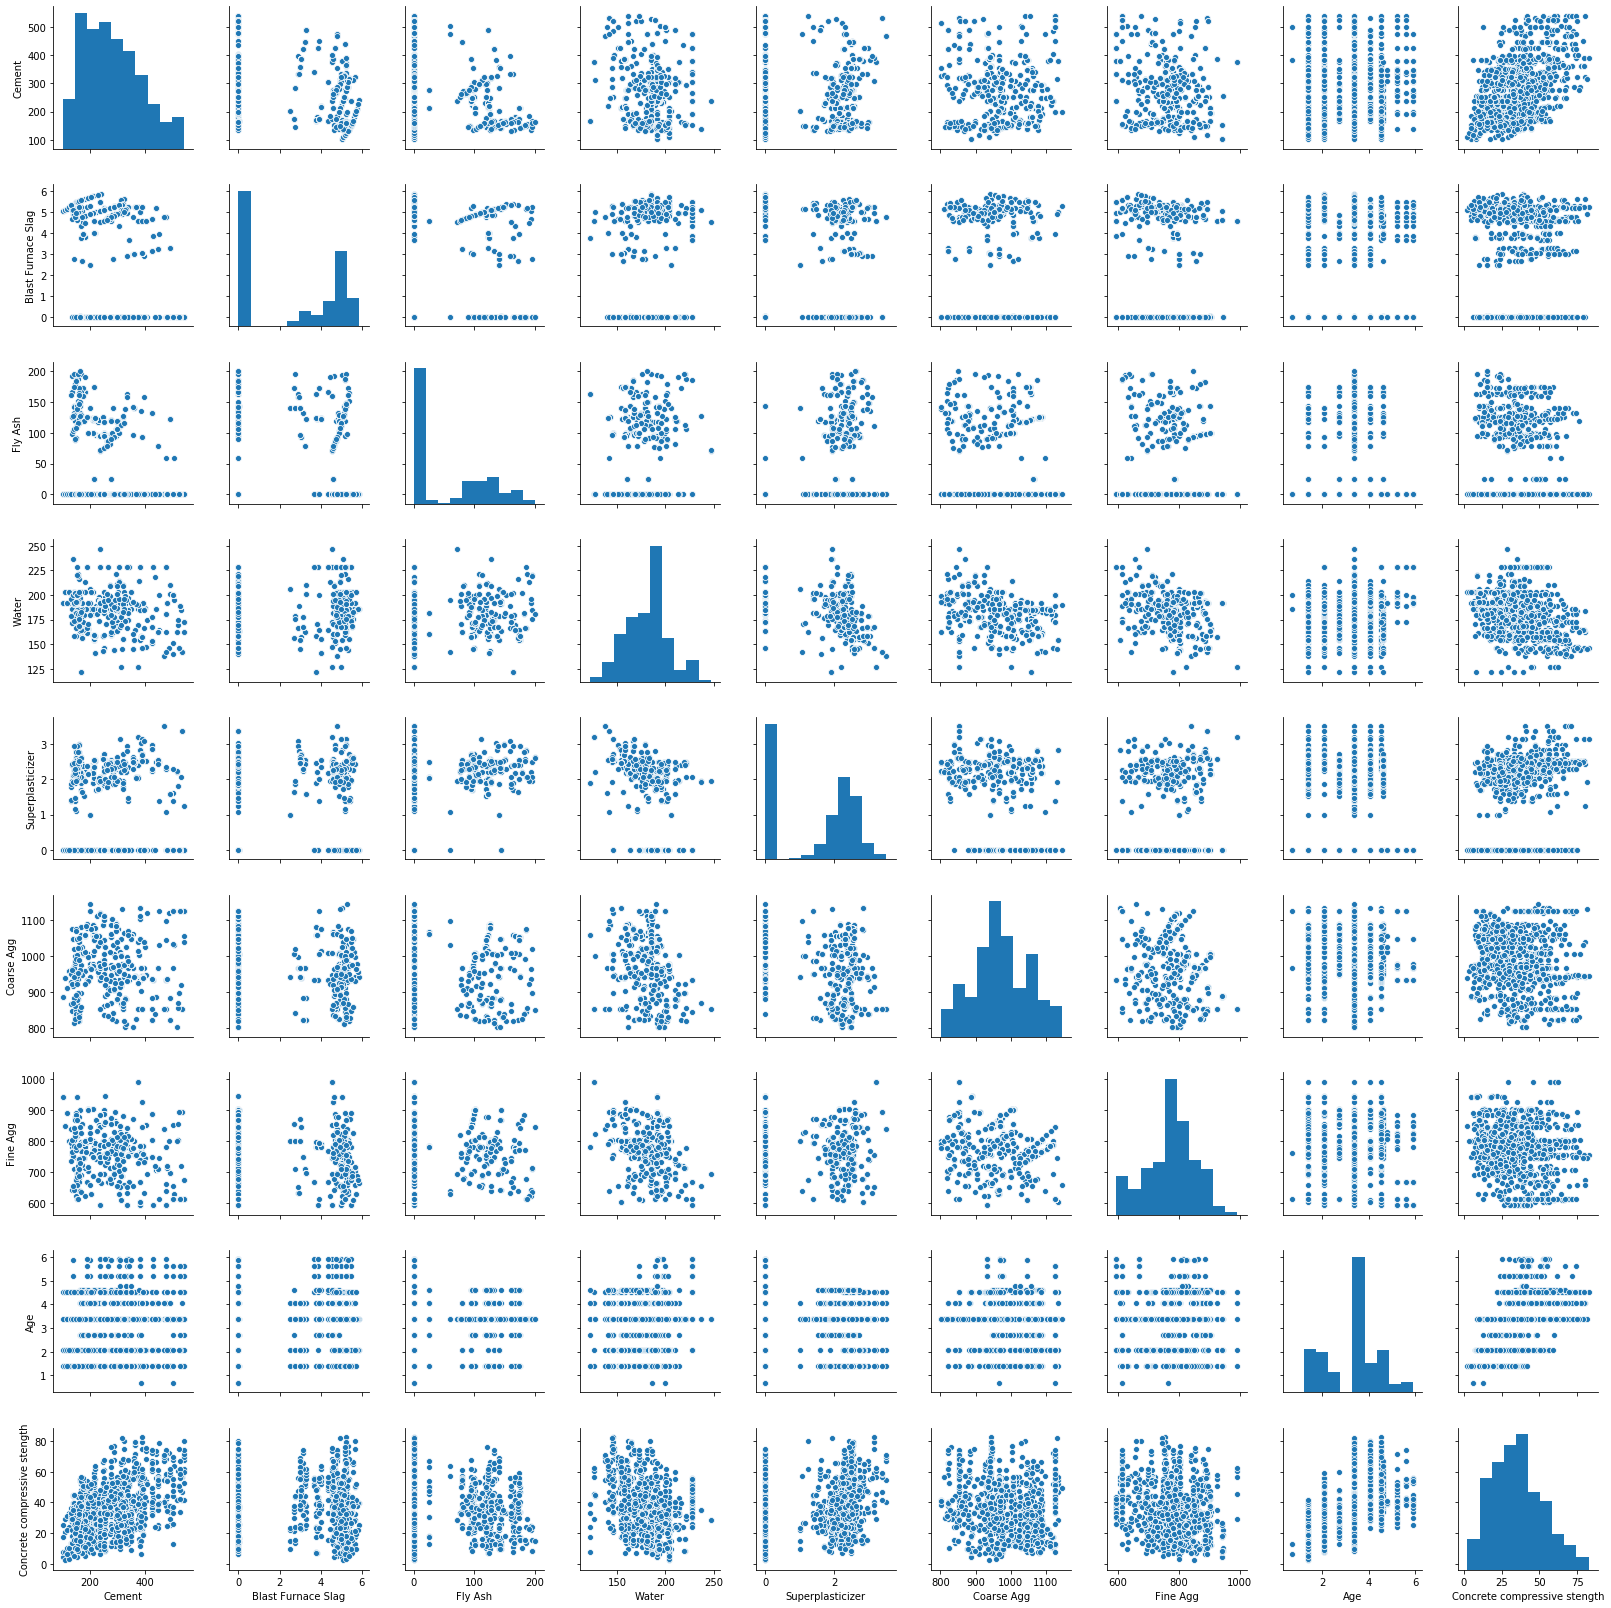

In [67]:
sns.pairplot(cs)

In [68]:
cs.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Agg,Fine Agg,Age,Concrete compressive stength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,2.553757,54.187136,181.566359,1.454741,972.918592,773.578883,3.242209,35.817836
std,104.507142,2.411720,63.996469,21.355567,1.154941,77.753818,80.175427,1.110431,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,0.693147,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,2.079442,23.707115
50%,272.900000,3.135494,0.000000,185.000000,1.994700,968.000000,779.510000,3.367296,34.442774
75%,350.000000,4.969466,118.270000,192.000000,2.412336,1029.400000,824.000000,4.043051,46.136287
max,540.000000,5.887215,200.100000,247.000000,3.502550,1145.000000,992.600000,5.902633,82.599225


In [69]:
cs.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Agg', 'Fine Agg', 'Age', 'Concrete compressive stength'],
      dtype='object')

In [70]:
df_x=cs.drop(columns=["Concrete compressive stength"])
y=cs[["Concrete compressive stength"]]

In [71]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)

In [72]:
x=pd.DataFrame(x,columns=df_x.columns)

In [73]:
x

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Agg,Fine Agg,Age
0,2.477918,-1.059409,-0.847132,-0.916663,-0.174967,0.863160,-1.217658,0.112702
1,2.477918,-1.059409,-0.847132,-0.916663,-0.174967,1.056170,-1.217658,0.112702
2,0.491443,1.000842,-0.847132,2.175367,-1.260193,-0.526514,-2.240913,2.126253
3,0.491443,1.000842,-0.847132,2.175367,-1.260193,-0.526514,-2.240913,2.397013
4,-0.790432,0.970565,-0.847132,0.488805,-1.260193,0.070531,0.647908,2.384619
...,...,...,...,...,...,...,...,...
1025,-0.045623,0.916147,0.564569,-0.092122,0.725752,-1.323003,-0.065874,0.112702
1026,0.392837,-1.059409,0.960095,0.676201,0.847964,-1.994679,0.496916,0.112702
1027,-1.270057,0.991782,0.850661,0.521599,0.437771,-1.036061,0.080127,0.112702
1028,-1.168580,1.112231,-0.847132,-0.279518,0.913788,0.214646,0.191188,0.112702


In [74]:
import warnings
warnings.filterwarnings('ignore')
def random(alg):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2scr=r2_score(y_test,pred)
        if r2scr > r_state:
            r_state=r2scr
            final_r=r_score
    print(r_state,'at',final_r)

In [75]:
def model(a):
    ml=a
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print('mean_squared_error',mean_squared_error(y_test,pred))
    print('mean_absolute_error',mean_absolute_error(y_test,pred))
    print('r2_score',r2_score(y_test,pred))

In [76]:
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score)
    print(score.mean())
    print(score.std())

In [77]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
lm=LinearRegression()
random(lm)

0.8392657505049058 at 53


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=53)
model(lm)

mean_squared_error 46.75837363131851
mean_absolute_error 5.297703479014912
r2_score 0.8392657505049058


In [79]:
cross_val(lm)

[0.71930655 0.66394379 0.7828129  0.85819317 0.34223667]
0.6732986166358239
0.17775580575871125


In [80]:
l=Lasso()
alphavalue={'alpha':[1,0.1,0.01,0.001,0]}
g=GridSearchCV(estimator=l,param_grid=alphavalue)
g.fit(x_train,y_train)
g.best_params_

{'alpha': 0.1}

In [81]:
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.7869760571285583

In [82]:
r=Ridge()
alphavalue={'alpha':[1,0.1,0.01,0.001,0]}
gr=GridSearchCV(estimator=r,param_grid=alphavalue)
gr.fit(x_train,y_train)
gr.best_params_

{'alpha': 1}

In [83]:
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.7876403116732686

Decision tree Regressor

In [84]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
random(dtr)

0.8860720040167099 at 99


In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=99)
model(dtr)

mean_squared_error 32.064628824297905
mean_absolute_error 3.882362103891406
r2_score 0.8875152177698575


In [86]:
cross_val(dtr)

[ 0.51415726  0.4323488   0.46326656  0.81542785 -1.16709743]
0.21162060725838555
0.7027121265452793


In [87]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
random(knr)

0.8774096319126665 at 61


In [88]:
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knr,parameters,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'n_neighbors': 2}

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=61)
knr=KNeighborsRegressor(n_neighbors=2)
model(knr)

mean_squared_error 33.22844498570015
mean_absolute_error 3.9706378212565454
r2_score 0.8850466728080697


In [90]:
cross_val(knr)

[ 0.40368363  0.45341177  0.6600651   0.8201188  -0.66835476]
0.33378490691048435
0.5227733254466739


In [91]:
from sklearn.svm import SVR
svm=SVR()
random(svm)

0.804194648325562 at 91


In [92]:
parameters={'kernel':['rbf','linear'],'C':[1,10,100,1000]}
grd=GridSearchCV(svm,parameters)
grd.fit(x_train,y_train)
grd.best_params_

{'C': 100, 'kernel': 'rbf'}

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=91)
svm=SVR(kernel='rbf')
model(svm)

mean_squared_error 52.35215732874822
mean_absolute_error 5.339852591930235
r2_score 0.804194648325562


In [94]:
cross_val(svm)

[0.32961952 0.55875505 0.73239168 0.69496565 0.02169068]
0.46748451610410113
0.26381534347198654


In [95]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
random(rfr)

0.9155804659153407 at 47


In [96]:
parameters={'n_estimators':[10,100,500,1000]}
gd=GridSearchCV(rfr,parameters)
gd.fit(x_train,y_train)
print(gd.best_score_)
print(gd.best_params_)

0.8697317612367874
{'n_estimators': 100}


In [97]:
rfr=RandomForestRegressor(n_estimators=1000)
model(rfr)

mean_squared_error 24.819015063947155
mean_absolute_error 3.5122259167631
r2_score 0.9071729567457436


In [98]:
cross_val(svm)

[0.32961952 0.55875505 0.73239168 0.69496565 0.02169068]
0.46748451610410113
0.26381534347198654


In [99]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gbr=GradientBoostingRegressor()
grid=GridSearchCV(gbr, parameters)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [100]:
random(gbr)

0.9227728415215247 at 77


In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=77)
gbr=GradientBoostingRegressor(learning_rate=0.001,n_estimators=1000)
model(gbr)

mean_squared_error 117.58229370380471
mean_absolute_error 8.671154724303173
r2_score 0.6117087859766588


In [102]:
cross_val(gbr)

[ 0.13904325  0.51572023  0.58511402  0.32544175 -0.545391  ]
0.20398565198073695
0.4057022914312584


From the all of the above algorithms,we get the highest score of 0.923 at random state of 77 from Gradient Boosting Regressor

In [103]:
from sklearn.externals import joblib
joblib.dump(gbr,'Cement2.pkl')

['Cement2.pkl']